> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset (IMDB dataset)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this project we will investigate the IMDB dataset and we will try to fine the most profitable year for movies 

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

movies=pd.read_csv('tmdb-movies.csv')
movies.head(7)

id    imdb_id  popularity     budget     revenue  \
0  135397  tt0369610   32.985763  150000000  1513528810   
1   76341  tt1392190   28.419936  150000000   378436354   
2  262500  tt2908446   13.112507  110000000   295238201   
3  140607  tt2488496   11.173104  200000000  2068178225   
4  168259  tt2820852    9.335014  190000000  1506249360   
5  281957  tt1663202    9.110700  135000000   532950503   
6   87101  tt1340138    8.654359  155000000   440603537   

                 original_title  \
0                Jurassic World   
1            Mad Max: Fury Road   
2                     Insurgent   
3  Star Wars: The Force Awakens   
4                     Furious 7   
5                  The Revenant   
6            Terminator Genisys   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...   
5  Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...   
6  Arnold Schwarzenegger|Jason Clarke|Emilia Clar...   

                                            homepage  \
0                      http://www.jurassicworld.com/   
1                        http://www.madmaxmovie.com/   
2     http://www.thedivergentseries.movie/#insurgent   
3  http://www.starwars.com/films/star-wars-episod...   
4                           http://www.furious7.com/   
5       http://www.foxmovies.com/movies/the-revenant   
6                    http://www.terminatormovie.com/   

                         director  \
0                 Colin Trevorrow   
1                   George Miller   
2                Robert Schwentke   
3                     J.J. Abrams   
4                       James Wan   
5  Alejandro GonzÃ¡lez IÃ±Ã¡rritu   
6                     Alan Taylor   

                                           tagline      ...       \
0                                The park is open.      ...        
1                               What a Lovely Day.      ...        
2                       One Choice Can Destroy You      ...        
3                    Every generation has a story.      ...        
4                              Vengeance Hits Home      ...        
5  (n. One who has returned, as if from the dead.)      ...        
6                                 Reset the future      ...        

                                            overview runtime  \
0  Twenty-two years after the events of Jurassic ...     124   
1  An apocalyptic story set in the furthest reach...     120   
2  Beatrice Prior must confront her inner demons ...     119   
3  Thirty years after defeating the Galactic Empi...     136   
4  Deckard Shaw seeks revenge against Dominic Tor...     137   
5  In the 1820s, a frontiersman, Hugh Glass, sets...     156   
6  The year is 2029. John Connor, leader of the r...     125   

                                      genres  \
0  Action|Adventure|Science Fiction|Thriller   
1  Action|Adventure|Science Fiction|Thriller   
2         Adventure|Science Fiction|Thriller   
3   Action|Adventure|Science Fiction|Fantasy   
4                      Action|Crime|Thriller   
5           Western|Drama|Adventure|Thriller   
6  Science Fiction|Action|Thriller|Adventure   

                                production_companies release_date vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...       6/9/15       5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...      5/13/15       6185   
2  Summit Entertainment|Mandeville Films|Red Wago...      3/18/15       2480   
3          Lucasfilm|Truenorth Productions|Bad Robot     12/15/15       5292   
4  Universal Pictures|Original Film|Media Rights ...       4/1/15       2947   
5  Regency Enterprises|Appian Way|CatchPlay|Anony...     12/25/15       3929   
6            Paramount Pictures|Skydance Productions   

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Removing unnecessary columns!)

In [3]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.

movies.drop(['imdb_id','homepage','tagline','keywords','production_companies','cast','overview','budget_adj','revenue_adj'],axis=1, inplace=True)
movies.columns

Index(['id', 'popularity', 'budget', 'revenue', 'original_title', 'director',
       'runtime', 'genres', 'release_date', 'vote_count', 'vote_average',
       'release_year'],
      dtype='object')

In [4]:
#replacing all zeros with number of mean
movies['budget']=movies['budget'].replace(0,1.755104e+07)
movies['revenue']=movies['revenue'].replace(0,1.755104e+07)

In [5]:
movies.describe()

id    popularity        budget       revenue       runtime  \
count   10866.000000  10866.000000  1.086600e+04  1.086600e+04  10866.000000   
mean    66064.177434      0.646441  2.382603e+07  4.954052e+07    102.070863   
std     92130.136561      1.000185  2.762817e+07  1.139822e+08     31.381405   
min         5.000000      0.000065  1.000000e+00  2.000000e+00      0.000000   
25%     10596.250000      0.207583  1.755104e+07  1.755104e+07     90.000000   
50%     20669.000000      0.383856  1.755104e+07  1.755104e+07     99.000000   
75%     75610.000000      0.713817  1.755104e+07  2.400000e+07    111.000000   
max    417859.000000     32.985763  4.250000e+08  2.781506e+09    900.000000   

         vote_count  vote_average  release_year  
count  10866.000000  10866.000000  10866.000000  
mean     217.389748      5.974922   2001.322658  
std      575.619058      0.935142     12.812941  
min       10.000000      1.500000   1960.000000  
25%       17.000000      5.400000   1995.000000  
50%       38.000000      6.000000   2006.000000  
75%      145.750000      6.600000   2011.000000  
max     9767.000000      9.200000   2015.000000

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 (What are the most profitable years for movies?)

In [6]:
movies['release_year'].value_counts()

2014    700
2013    659
2015    629
2012    588
2011    540
2009    533
2008    496
2010    490
2007    438
2006    408
2005    364
2004    307
2003    281
2002    266
2001    242
2000    227
1999    224
1998    210
1996    204
1997    192
1994    184
1993    178
1995    175
1988    145
1989    137
1992    133
1991    133
1990    132
1987    125
1986    121
1985    109
1984    105
1981     82
1982     81
1983     80
1980     78
1978     65
1979     57
1977     57
1971     55
1973     55
1974     47
1976     47
1966     46
1975     44
1964     42
1970     41
1967     40
1972     40
1968     39
1965     35
1963     34
1962     32
1960     32
1969     31
1961     31
Name: release_year, dtype: int64

In [7]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.

year_budget=movies.groupby('release_year')['budget'].sum()
year_budget.sort_values(ascending= False)

release_year
2014    16067672698
2013    16028290841
2015    14950433317
2012    14452050132
2010    13755209966
2011    13616526132
2009    13561028376
2008    12362084037
2007    11409042604
2006    10763740180
2005    10098797629
2004     9346669182
2003     8486390814
2002     7649744255
2001     7379496960
2000     7209436320
1999     7081563106
1998     6254764000
1997     6084965715
1996     5178880451
1995     4287518617
1994     3966759992
1993     3341671213
1991     2729907880
1992     2635236090
1990     2536045906
1989     2325780200
1988     2294329120
1987     1920477571
1986     1775147053
1985     1696476797
1984     1624315004
1982     1245142842
1983     1221149012
1980     1187398880
1981     1075799386
1978      875936531
1979      833998320
1973      714579263
1977      688111200
1966      654290160
1976      648681200
1971      637630280
1964      583565401
1970      583293986
1975      582810200
1974      533297040
1968      493163960
1965      491430075
1967   

In [8]:
year_revenue=movies.groupby('release_year')['revenue'].sum()
year_revenue.sort_values(ascending= False)

release_year
2015    34011030038
2014    32615241063
2013    31987314617
2012    31197415704
2011    28943352538
2009    28024666879
2010    26733881425
2008    24521496738
2007    23676571390
2006    19821049465
2005    19676022308
2004    19303621338
2003    17630491222
2002    16872600608
2001    15410901699
1999    13216122819
2000    13014621652
1997    12147011634
1998    11318483098
1995    10472669160
1996    10066596279
1994     8797880057
1993     8183723967
1992     6973256257
1990     6280473860
1989     6217986118
1991     5812315316
1988     4862817405
1987     4392309967
1986     3792575081
1985     3612916072
1984     3548178498
1982     3178036492
1983     2798958440
1977     2759767479
1981     2511749916
1980     2453152947
1979     2211326113
1978     2089372299
1973     1890920622
1975     1466470126
1976     1345087840
1974     1339071018
1967     1194161677
1971     1124503250
1970     1051651089
1972     1021261371
1965      984613054
1964      937717142
1966   

In [9]:
#adding top 25 rsults to a new series
top_year_revenue=year_revenue.nlargest(25)
top_year_revenue

release_year
2015    34011030038
2014    32615241063
2013    31987314617
2012    31197415704
2011    28943352538
2009    28024666879
2010    26733881425
2008    24521496738
2007    23676571390
2006    19821049465
2005    19676022308
2004    19303621338
2003    17630491222
2002    16872600608
2001    15410901699
1999    13216122819
2000    13014621652
1997    12147011634
1998    11318483098
1995    10472669160
1996    10066596279
1994     8797880057
1993     8183723967
1992     6973256257
1990     6280473860
Name: revenue, dtype: int64

Text(0,0.5,'Revenue')

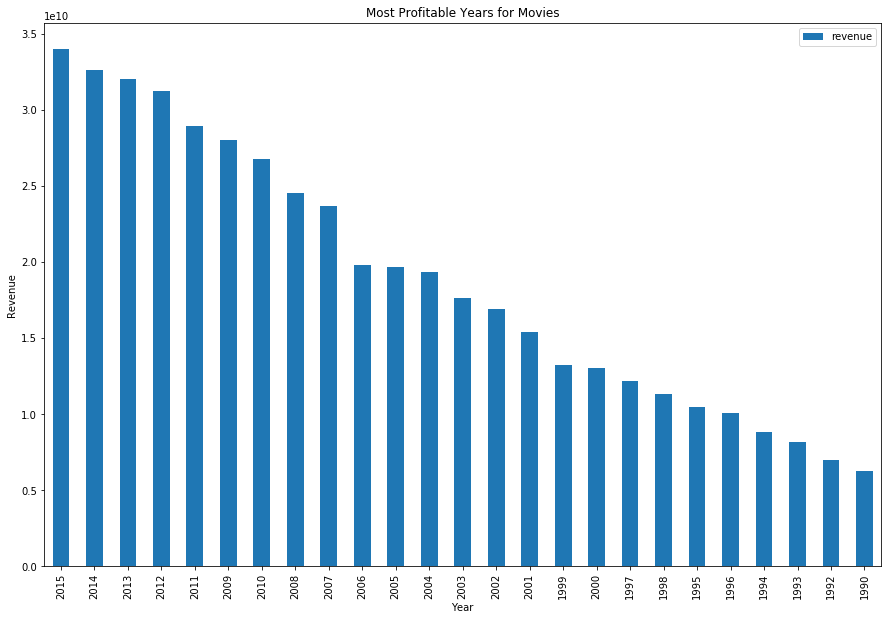

In [10]:
#finding out what are the most profitable years in movies industry!###

top_year_revenue.plot(x='release_year',y='revenue',kind='bar', figsize=(15,10), title='Most Profitable Years for Movies', legend=True)
plt.xlabel('Year')
plt.ylabel('Revenue')

## In the visualization above:
### Newer movies are more profitable!

## Research Question 2  (What is the relationship between revenue and rating?)

Text(0,0.5,'Revenue')

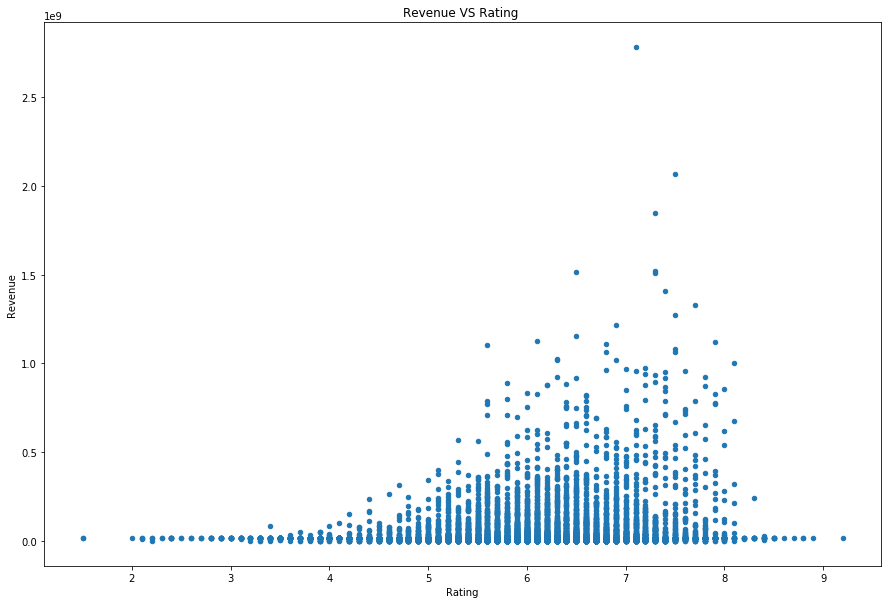

In [11]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.

movies.plot(x='vote_average', y='revenue', kind='scatter',figsize=(15,10))
plt.title('Revenue VS Rating ')
plt.xlabel('Rating')
plt.ylabel('Revenue')

<a id='conclusions'></a>
## In the visualization above:
### Higher vote ratings compliment higher revenues.
### Many movies with revenue less than 1 billion dollars hovering between 5 & 8 out of 10


## Conclusions

### In Quastion 1(the most profitable years for movies?):
#### - New movies are more profitable.
#### - New movies spent more in budgets.

###  In Quastion 2 (The relationship between revenue and rating):
#### - Higher vote ratings compliment higher revenues.
#### - Many movies with revenue less than 1 billion dollars hovering between 5 & 8 out of 10.

### Limitations: there were some limitations of this dataset:

##### Many (null) values.
#### very difficult to manipulate text or string values.
#### Many zero values of budget & revenue.

## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [31]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0